In [40]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [41]:
print(pd.__version__)

1.4.1


## Abrir los pickles obtenidos con las siguientes columnas
### Main index - Hace referencia al índice del ejemplo de ese corpus TEST
### Text - Hace referencia a los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### Hipótesis - Hace referencia a los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### R_Text - Hace referencia a los embeddings de los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### R_Hip - Hace referencia a los embeddings de los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### M_Align - Hace referencia a la matriz de alineamiento de los tokens del Texto y de la Hipótesis 
### Prediction - Hace referencia a la predicción del modelo para ese ejemplo
### Gol_label - Etiqueta correcta del ejemplo
### Idx - Número de ejemplo, el primero es el real y los deḿas son con la hipótesis parafraseada

In [3]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [7]:
carpeta="data/gpt3_salida/"

In [8]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/gpt3_salida/pOriginales.csv.pickle'

In [10]:
prueba=pd.read_pickle(a[0])
for index,strings in prueba.iterrows():
    if(strings["predicted_label"]!=strings["gold_label"]):
        print(strings["Idx"],strings["predicted_label"],strings["gold_label"])

3086 neutral entailment
2022 neutral entailment
6924 neutral contradiction
1166 neutral contradiction
6791 entailment neutral
5290 neutral contradiction
971 entailment neutral
2258 entailment neutral
5701 neutral entailment
7341 entailment neutral
9654 entailment neutral
67 contradiction neutral
9339 neutral entailment
1099 entailment neutral
707 entailment neutral
8219 contradiction neutral
4625 entailment neutral
347 entailment neutral
2126 contradiction entailment
2164 contradiction neutral
2045 entailment contradiction
1279 neutral contradiction
3922 contradiction neutral
4646 entailment neutral
3548 contradiction neutral
379 neutral entailment
2248 contradiction entailment
8362 neutral contradiction
2433 entailment neutral
8759 contradiction neutral
1744 neutral entailment
9555 neutral contradiction
8783 neutral contradiction
4803 neutral entailment
7959 entailment neutral
5840 neutral entailment
6739 neutral contradiction
8019 neutral contradiction
7947 neutral contradiction
2715

In [11]:
a[1]

'data/gpt3_salida/pparaphraseGPT2.csv.pickle'

# Procesamiento de todos los resultados para calcular la entropia de los alineamientos

In [12]:
etiquetas=['entailment','neutral','contradiction']

In [13]:
def entropia_f(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    probs = [np.mean(X == valor) for valor in set(X)]
    return round(np.sum(-p * np.log2(p) for p in probs)/np.log2(len(X)), 3)

In [39]:
a

,Docs,grupo,Total,Subtotal,E_P,entropia,Paraphrase
8,data/gpt3_salida/pOriginales.csv.pickle,Originales,58,1,contradiction_contradiction,[0.951],True


In [38]:
new_data = {'Docs' : [], 'grupo': [], 'Total' : [], 'Subtotal' : [], 'E_P' : [], 'entropia' : [], 'Paraphrase' : []}
etiquetas=['entailment','neutral','contradiction']
grupo=["Originales","GPT2","GPT3"]
i=0
for e in a:
    df=pd.read_pickle(e)
    df_prediction=df.copy()
    for l1 in etiquetas:
        for l2 in etiquetas:
            new_data['Docs'].append(e)
            new_data['grupo'].append(grupo[i])  
            subtotal=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].shape[0]
            total=df_prediction[df_prediction['gold_label']==l1].shape[0]
            new_data['Total'].append(total)
            new_data['Subtotal'].append(subtotal)
            new_data['E_P'].append(l1+"_"+l2)
            temp=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].copy()
            print(temp)
            l_entropia=[]
            for index,strings in temp.iterrows():
                t=strings[1]
                h=strings[2]
                matriz=strings[5]
                matriz_c=matriz[1:len(t)-1,1:len(h)-1]
                l_entropia.append(entropia_f(stats.zscore(matriz_c.T).flatten()))
            new_data['entropia'].append(np.array(l_entropia[:]))
            new_data['Paraphrase'].append(True)
            l_entropia.clear()
    i+=1
dfn=pd.DataFrame(new_data)

FileNotFoundError: [Errno 2] No such file or directory: 'Docs'

In [34]:
dfn.to_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [35]:
dfn=pd.read_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [36]:
dfn

,Docs,grupo,Total,Subtotal,E_P,entropia,Paraphrase
0,data/gpt3_salida/pOriginales.csv.pickle,Originales,40,0,entailment_entailment,[],True
1,data/gpt3_salida/pOriginales.csv.pickle,Originales,40,32,entailment_neutral,"[0.944, 0.942, 0.957, 0.904, 1.0, 0.979, 1.0, ...",True
2,data/gpt3_salida/pOriginales.csv.pickle,Originales,40,8,entailment_contradiction,"[0.982, 0.978, 0.936, 0.957, 0.96, 1.0, 0.941,...",True
3,data/gpt3_salida/pOriginales.csv.pickle,Originales,75,50,neutral_entailment,"[0.979, 1.0, 1.0, 0.969, 1.0, 1.0, 0.903, 0.96...",True
4,data/gpt3_salida/pOriginales.csv.pickle,Originales,75,1,neutral_neutral,[0.969],True
5,data/gpt3_salida/pOriginales.csv.pickle,Originales,75,24,neutral_contradiction,"[0.837, 1.0, 0.958, 1.0, 0.909, 0.894, 0.921, ...",True
6,data/gpt3_salida/pOriginales.csv.pickle,Originales,58,8,contradiction_entailment,"[0.953, 1.0, 0.832, 0.953, 0.908, 0.987, 0.976...",True
7,data/gpt3_salida/pOriginales.csv.pickle,Originales,58,49,contradiction_neutral,"[1.0, 0.897, 0.963, 0.947, 0.949, 0.925, 0.951...",True
8,data/gpt3_salida/pOriginales.csv.pickle,Originales,58,1,contradiction_contradiction,[0.951],True


In [37]:
len(dfn['grupo'].unique())

1

In [20]:
dfn['entropia'][0]

array([], dtype=float64)

In [21]:
etiquetas

['entailment', 'neutral', 'contradiction']

In [22]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [23]:
valores_labels=[]
for el in labels:
    a=dfn[(dfn['E_P']==el)]
    b=a['entropia'].values[0]
    valores_labels.append(b)
valores_labels

[array([], dtype=float64),
 array([0.944, 0.942, 0.957, 0.904, 1.   , 0.979, 1.   , 0.922, 0.969,
        0.949, 1.   , 0.966, 0.94 , 0.951, 1.   , 0.887, 0.975, 0.889,
        0.96 , 0.975, 0.874, 0.969, 0.997, 0.973, 0.977, 0.96 , 0.927,
        0.942, 0.796, 0.949, 1.   , 0.881]),
 array([0.982, 0.978, 0.936, 0.957, 0.96 , 1.   , 0.941, 0.911]),
 array([0.979, 1.   , 1.   , 0.969, 1.   , 1.   , 0.903, 0.967, 0.942,
        0.898, 1.   , 1.   , 0.918, 0.957, 1.   , 1.   , 0.966, 0.893,
        1.   , 0.944, 0.924, 1.   , 1.   , 0.92 , 0.959, 0.858, 0.96 ,
        0.878, 1.   , 0.965, 0.853, 0.919, 0.957, 0.868, 0.908, 0.964,
        1.   , 0.97 , 1.   , 0.894, 0.972, 0.912, 0.987, 0.902, 1.   ,
        1.   , 0.874, 1.   , 0.938, 1.   ]),
 array([0.969]),
 array([0.837, 1.   , 0.958, 1.   , 0.909, 0.894, 0.921, 0.993, 0.967,
        0.885, 0.905, 0.967, 0.962, 0.933, 0.964, 0.976, 0.977, 1.   ,
        0.921, 0.951, 0.956, 1.   , 1.   , 1.   ]),
 array([0.953, 1.   , 0.832, 0.953, 0.

In [24]:
len(valores_labels)

9

([<matplotlib.axis.XTick at 0x7f158e6f1730>,
 [Text(0, 0, 'entailment_entailment'),
  Text(1, 0, 'entailment_neutral'),
  Text(2, 0, 'entailment_contradiction'),
  Text(3, 0, 'neutral_entailment'),
  Text(4, 0, 'neutral_neutral'),
  Text(5, 0, 'neutral_contradiction'),
  Text(6, 0, 'contradiction_entailment'),
  Text(7, 0, 'contradiction_neutral'),
  Text(8, 0, 'contradiction_contradiction')])

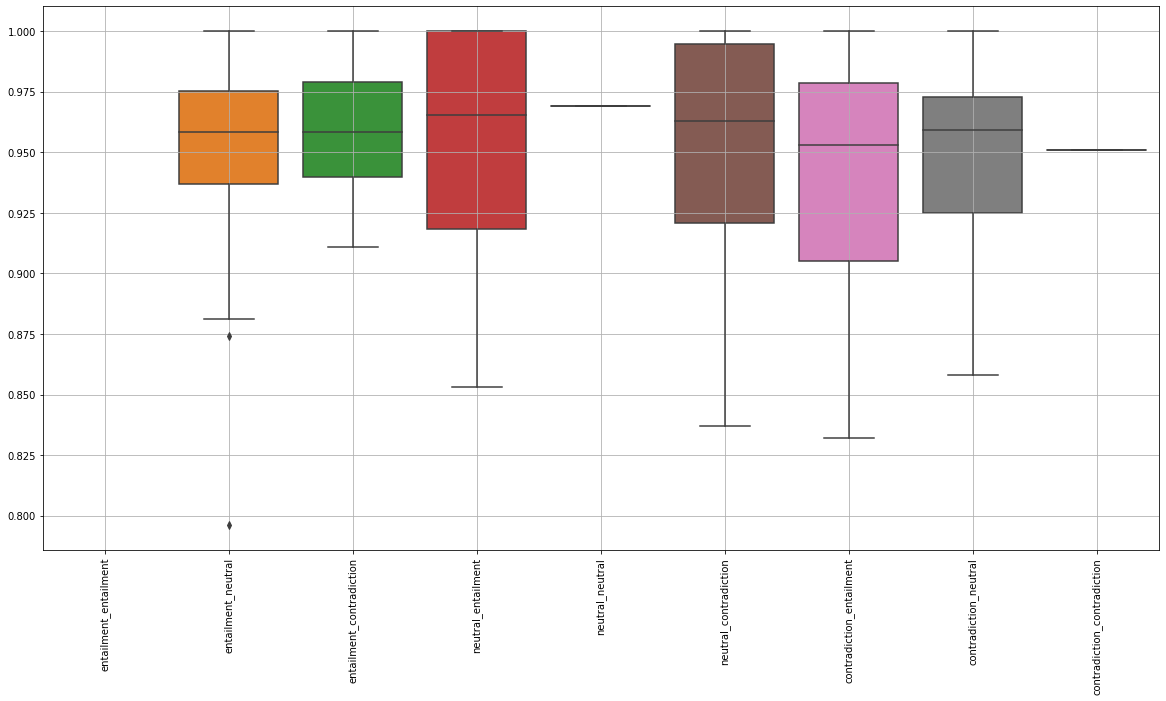

In [25]:
fig2 = plt.figure(figsize=(20,10))
sns.boxplot(data=valores_labels)
plt.grid()
plt.xticks(range(9),labels,rotation=90)

# Procesamiento para generar boxplot por muestreos

In [26]:
l_grupos=dfn.grupo.unique()
labels_g=[]
datos_g=[]
grupo_g=[]
for lg in l_grupos:
    for lab in labels:
        l_mean_entropia=[]
        temp=dfn[(dfn['grupo']==lg) & (dfn['E_P']==lab) & (dfn['Paraphrase']==0)]
        for index,strings in temp.iterrows():
            l_mean_entropia.append(np.nanmean(strings['entropia']))
        labels_g.append(lab)
        datos_g.append(l_mean_entropia[:])
        l_mean_entropia.clear()
        grupo_g.append(lg)

In [27]:
l_grupos

array(['Originales'], dtype=object)

In [28]:
l_grupos_p=dfn.grupo.unique()
labels_g_p=[]
datos_g_p=[]
grupo_g_p=[]
muestreo=[]
g=["GPT2","GPT3"]
i=0
for lg in l_grupos_p:
    for lab in labels:
        l_mean_entropia_p=[]
        temp=dfn[(dfn['grupo']==lg) & (dfn['E_P']==lab) & (dfn['Paraphrase']==1)]
        for index,strings in temp.iterrows():
            mean=np.nanmean(strings['entropia'])
        labels_g_p.append(lab)
        datos_g_p.append(mean)
        l_mean_entropia_p.clear()
        grupo_g_p.append(lg)
        muestreo.append(g[i])
    i+=1

/tmp/ipykernel_41217/851018540.py:13: RuntimeWarning: Mean of empty slice
  mean=np.nanmean(strings['entropia'])


In [29]:
muestreo

['GPT2', 'GPT2', 'GPT2', 'GPT2', 'GPT2', 'GPT2', 'GPT2', 'GPT2', 'GPT2']

In [30]:
datosGPT=pd.DataFrame([datos_g_p,labels_g_p,muestreo],index=["values","labels","grupo"])
datosGPT=datosGPT.T

In [31]:
datosGPT

,values,labels,grupo
0,NaN,entailment_entailment,GPT2
1,0.948562,entailment_neutral,GPT2
2,0.958125,entailment_contradiction,GPT2
3,0.95436,neutral_entailment,GPT2
4,0.969,neutral_neutral,GPT2
5,0.953167,neutral_contradiction,GPT2
6,0.93825,contradiction_entailment,GPT2
7,0.950367,contradiction_neutral,GPT2
8,0.951,contradiction_contradiction,GPT2


<AxesSubplot:xlabel='labels', ylabel='values'>

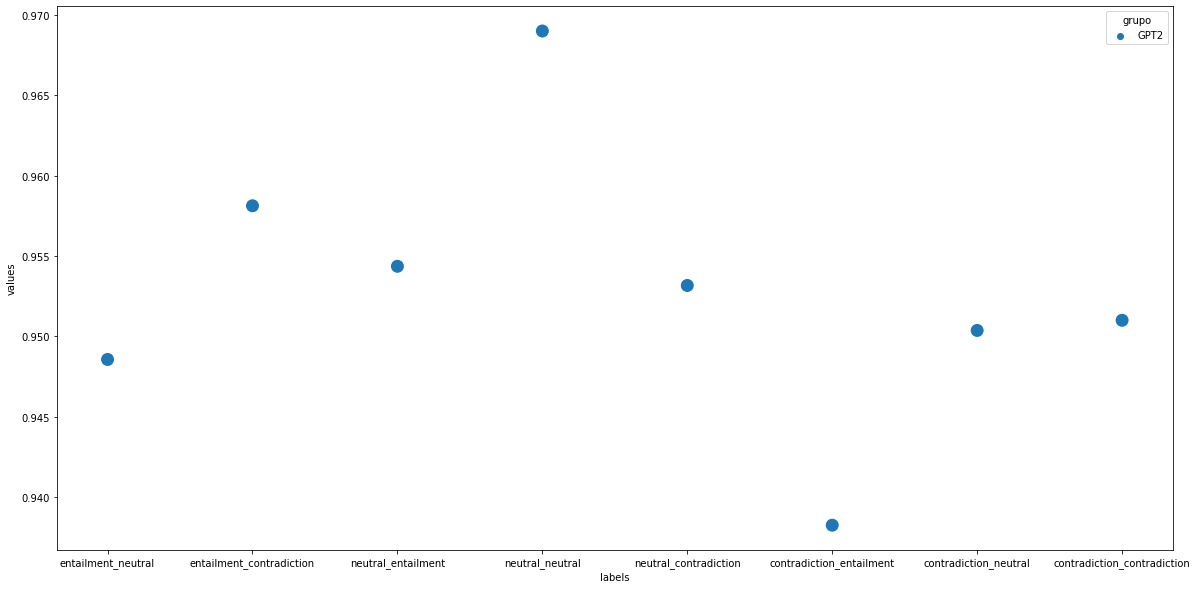

In [32]:
fig2 = plt.figure(figsize=(20,10))
#ax = fig2.add_axes([-1,1,1,1])
#ax.tick_params(labelsize=10)
#ax.grid(visible=True)
sns.scatterplot(data=datosGPT,x="labels",y="values",hue="grupo",s=200)
#ax.set_xticklabels(labels_g_p,fontsize=20,rotation=90)
#plt.title("MEAN entropy grupo GPT2 vs GPT3",fontsize=30)

IndexError: list index out of range

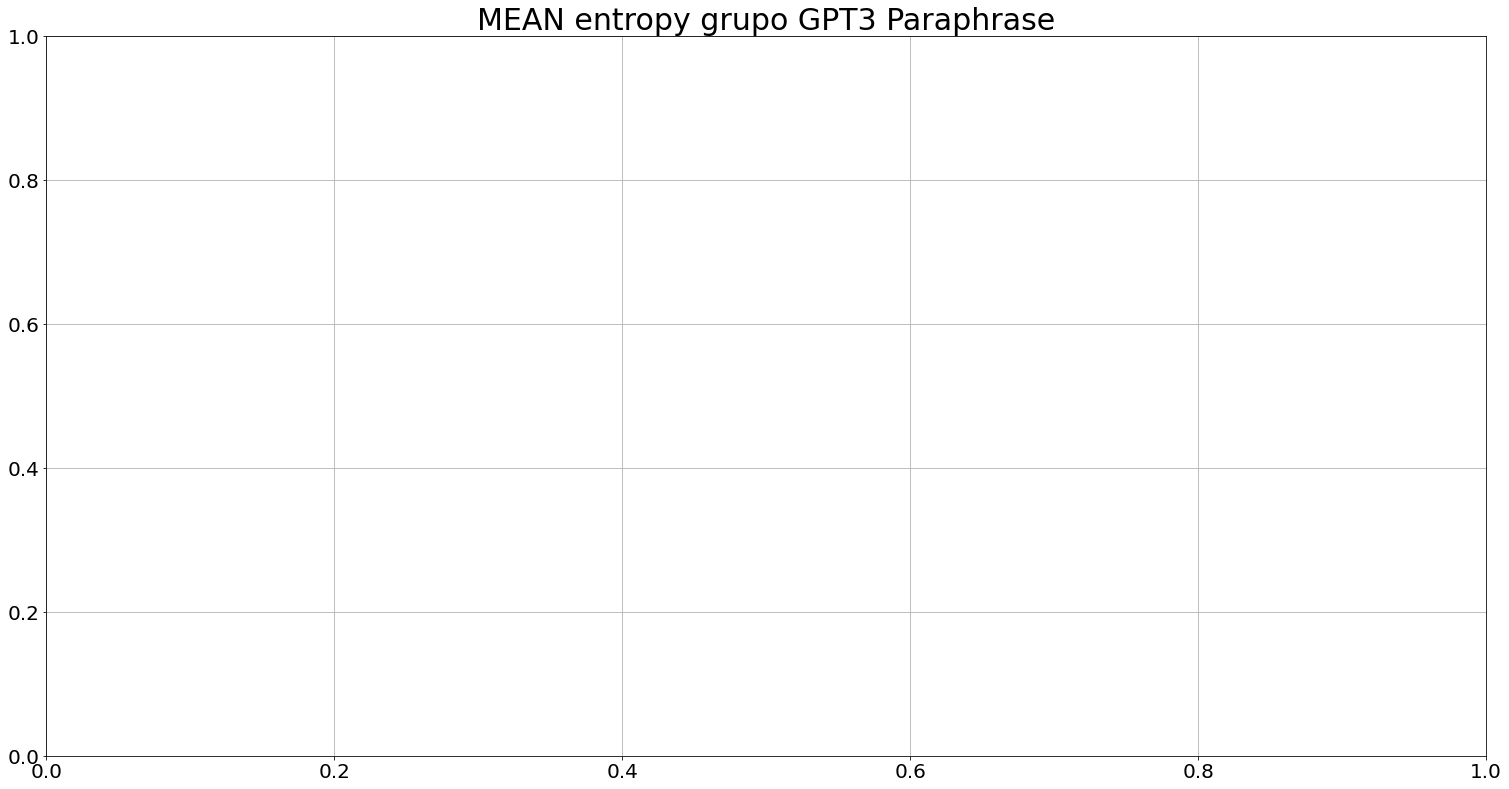

In [33]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo GPT3 Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[9:18],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[9:18],fontsize=20,rotation=90)
